In [3]:
# Ridge Regression on California Housing Dataset
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

as_frame=False (default) →

data is a NumPy array

target is a NumPy array

Feature names are stored separately in feature_names.

as_frame=True →

data is returned as a pandas DataFrame

target is returned as a pandas Series

This makes it easier to work with feature names directly (column labels are included).

In [4]:
# Load California housing dataset
housing = fetch_california_housing(as_frame=True)

In [5]:
X = housing.data
y = housing.target

In [6]:
# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
14196,3.2596,33.0,5.017657,1.006421,2300.0,3.691814,32.71,-117.03
8267,3.8125,49.0,4.473545,1.041005,1314.0,1.738095,33.77,-118.16
17445,4.1563,4.0,5.645833,0.985119,915.0,2.723214,34.66,-120.48
14265,1.9425,36.0,4.002817,1.033803,1418.0,3.994366,32.69,-117.11
2271,3.5542,43.0,6.268421,1.134211,874.0,2.300000,36.78,-119.80
...,...,...,...,...,...,...,...,...
11284,6.3700,35.0,6.129032,0.926267,658.0,3.032258,33.78,-117.96
11964,3.0500,33.0,6.868597,1.269488,1753.0,3.904232,34.02,-117.43
5390,2.9344,36.0,3.986717,1.079696,1756.0,3.332068,34.03,-118.38
860,5.7192,15.0,6.395349,1.067979,1777.0,3.178891,37.58,-121.96


In [8]:
ridge_regressor = Ridge()


In [9]:
ridge_regressor

,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [10]:
parameters={'alpha':[1,2,5,10,20,30,40,50,60,70,80,90]}
ridgecv=GridSearchCV(ridge_regressor,parameters,scoring='neg_mean_squared_error',cv=5)
ridgecv.fit(X_train,y_train)


,estimator,Ridge()
,param_grid,"{'alpha': [1, 2, ...]}"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,alpha,10


In [12]:
print(ridgecv.best_params_)

{'alpha': 10}


In [14]:
print(ridgecv.best_score_)

-0.519254825853177


In [16]:
ridge_pred=ridgecv.predict(X_test)


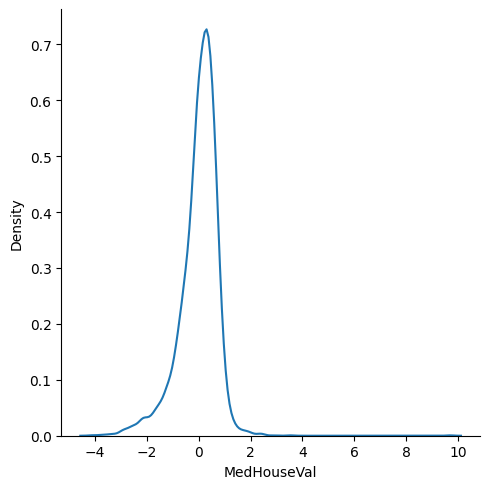

In [17]:
import seaborn as sns
sns.displot(ridge_pred-y_test,kind='kde')

In [18]:
score=r2_score(ridge_pred,y_test)
print(score)

0.33693146115042727



# Lasso Regression

In [19]:
from sklearn.linear_model import Lasso


In [20]:
lasso = Lasso()


In [21]:
parameters={'alpha':[1,2,5,10,20,30,40,50,60,70,80,90]}
lassocv=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
lassocv.fit(X_train,y_train)


,estimator,Lasso()
,param_grid,"{'alpha': [1, 2, ...]}"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,alpha,1


In [22]:
print(lassocv.best_params_)
print(lassocv.best_score_)

{'alpha': 1}
-0.9489171123085205


In [23]:
lasso_pred=lassocv.predict(X_test)


In [24]:
lasso_pred

array([1.72559335, 1.87880366, 2.14751489, ..., 2.8426924 , 1.95352989,
       1.95475031])

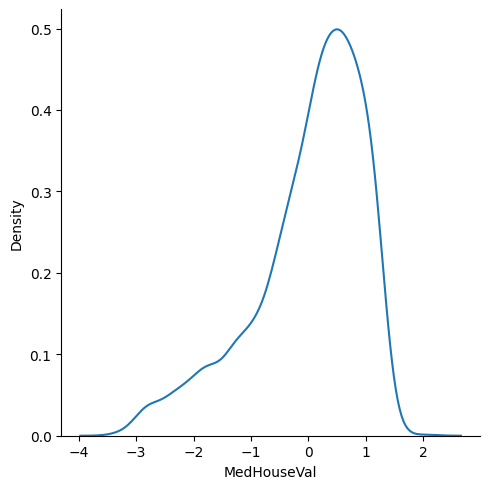

In [26]:
import seaborn as sns
sns.displot(lasso_pred-y_test,kind='kde')